In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn import preprocessing

In [2]:
%matplotlib inline

In [3]:
data_train = pd.read_csv('./data/train.csv')
data_test = pd.read_csv('./data/test.csv')

### Split

In [4]:
X = data_train[data_train.columns.difference(['Price'])]
y = data_train.Price
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 9254 to 7270
Data columns (total 19 columns):
DistrictId       8000 non-null int64
Ecology_1        8000 non-null float64
Ecology_2        8000 non-null object
Ecology_3        8000 non-null object
Floor            8000 non-null int64
Healthcare_1     4148 non-null float64
Helthcare_2      8000 non-null int64
HouseFloor       8000 non-null float64
HouseYear        8000 non-null int64
Id               8000 non-null int64
KitchenSquare    8000 non-null float64
LifeSquare       6299 non-null float64
Rooms            8000 non-null float64
Shops_1          8000 non-null int64
Shops_2          8000 non-null object
Social_1         8000 non-null int64
Social_2         8000 non-null int64
Social_3         8000 non-null int64
Square           8000 non-null float64
dtypes: float64(7), int64(9), object(3)
memory usage: 1.2+ MB


### Plots

In [5]:
def square_lifesquare(ds):
    plt.xlabel('Square')
    plt.ylabel('Life Square')
    plt_ = plt.scatter(ds.Square, ds.LifeSquare)

In [6]:
def floor_housefloor(ds):
    plt.xlabel('House Floor')
    plt.ylabel('Floor')
    plt_ = plt.scatter(ds.HouseFloor, ds.Floor)

In [7]:
def housefloor_year(ds):
    plt.ylabel('HouseFloor')
    plt.xlabel('HouseYear')
    plt_ = plt.scatter(ds.HouseYear, ds.HouseFloor)

In [8]:
def housefloor_floor(ds):
    plt.xlabel('HouseFloor')
    plt.ylabel('Floor')
    plt_ = plt.scatter(ds.HouseFloor, ds.Floor)

### Data preparing

In [9]:
def drop_healthcare(ds):
    return ds.drop(columns=['Healthcare_1'], axis=1)

In [10]:
def drop_kitchen(ds):
    return ds.drop(columns=['KitchenSquare'], axis=1)

In [11]:
def set_dummies(ds):
    return pd.get_dummies(ds)

In [12]:
def fill_lifesquare(ds):
    ds.LifeSquare = ds.LifeSquare.fillna(1)
    ds.LifeSquare = np.where((ds.LifeSquare < 8) | (ds.LifeSquare > ds.Square), ds.Square, ds.LifeSquare)
    return ds

In [13]:
def prepare(ds):
    ds = drop_healthcare(ds)
    ds = drop_kitchen(ds)
    ds = set_dummies(ds)
    ds = fill_lifesquare(ds)
    return ds

In [14]:
X_train = prepare(X_train)
X_valid = prepare(X_valid)

#### Visual analisis after data preparation

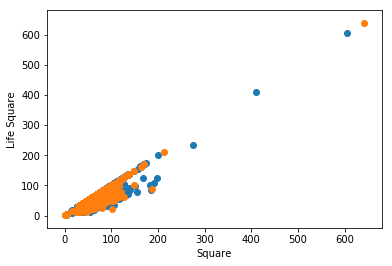

In [15]:
square_lifesquare(X_train)
square_lifesquare(X_valid)

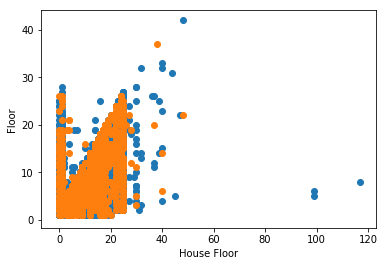

In [16]:
floor_housefloor(X_train)
floor_housefloor(X_valid)

In [17]:
data_train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


### Model/ RandomForestRegressor

In [18]:
feats_original = ['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor',
         'HouseFloor', 'HouseYear', 'Ecology_1',
         'Social_1', 'Social_2', 'Social_3', 'Helthcare_2', 'Shops_1']
feats_dummies = ['Ecology_2_A', 'Ecology_2_B', 'Ecology_3_A', 'Ecology_3_B', 'Shops_2_A', 'Shops_2_B']
fats = feats_original

In [19]:
model = RandomForestRegressor(max_depth=12, random_state=42, n_estimators=50)
model.fit(X_train.loc[:, feats], y_train)

NameError: name 'feats' is not defined

In [ ]:
def get_prediction(ds, y, r2=False):
    pred = model.predict(ds.loc[:, feats])
    if r2:
        print(r2_score(y, pred))
    return pred

In [ ]:
pred_train = get_prediction(ds=X_train, y=y_train, r2=True)

In [ ]:
pred_valid = get_prediction(ds=X_valid, y=y_valid, r2=True)